In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'

In [2]:
directory = 'D:\\Thalamus_Cache'

numbersessions = 0
numberdisqlen = 0
numberdisqISI = 0
numberdisqFR = 0
numAC = 0
numM2 = 0
numTrim = 0

sessions = os.listdir(directory)
for session in sessions:
    sessionfile = ilep.loadSessionCached(directory,session)
    numbersessions += 1
    if hasattr(sessionfile.disqualified,'NumTrials'):
        numberdisqlen += len(sessionfile.disqualified.NumTrials)
    if hasattr(sessionfile.disqualified,'ISI'):
        numberdisqISI += len(sessionfile.disqualified.ISI)
    if hasattr(sessionfile.disqualified,'FRthresh'):
        numberdisqFR += len(sessionfile.disqualified.FRthresh)

    if sessionfile.meta.region == 'AC':
        numAC += len(sessionfile.clusters.good)
    elif sessionfile.meta.region == 'M2':
        numM2 += len(sessionfile.clusters.good)
    else:
        pass
    
    if hasattr(sessionfile,'trim'):
        numTrim += 1

print(str(numbersessions)+' sessions')
print('AC       : ' + str(numAC))
print('M2       : ' + str(numM2))
print('Trim     : ' + str(numTrim))
print('Disq Len : ' + str(numberdisqlen))
print('Disq ISI : ' + str(numberdisqISI))
print('Disq FR  : ' + str(numberdisqFR))
print(sessionfile.meta)

3 sessions
AC       : 0
M2       : 0
Trim     : 0
Disq Len : 0
Disq ISI : 1
Disq FR  : 0
namespace(animal='BS_152', arraystart=0, date='7/5/2022', depth=2900, directory='D:\\ThalamusRecording\\BS_152\\BS_152 6\\MGB\\', files=['June 5 2022 Thalamus BS_152_4004'], fs=30000, length_in_minutes=5.073002777777777, length_in_samples=9131405.0, length_in_seconds=304.38016666666664, length_in_trials=213, lickdelayrelativetostart=0.2, lickdelayrelativetotone=0.1, probe=8945, recording_session=6, region='MGB', task='thalamus tuning', tonelength=0.1, triallength=2.5)


In [84]:
starttime = pytime.time()

#if False:
if True:    
    #Trim Sessions
    #ilep.trimSessions('S:\\Sorts\DualRecording',replace=False)
    #endtime1 = pytime.time()
    #print('END TRIMMING')
    #Calculate Responsiveness
    #ilep.calculateResponsiveness('S:\\Sorts\DualRecording',replace=True)
    #endtime2 = pytime.time()
    #print('END RESPONSIVENESS')
    #Finish
    ilep.loadSessionsComplete('D:\\ThalamusRecording',destination='D:\\Thalamus_Cache',verbose=False)
    endtime3 = pytime.time()
    print('END PROCESS')
    #print('Trimming       : ' + str((endtime1-starttime)/60)+' minutes elapsed');
    #print('Responsiveness : ' + str((endtime2-starttime)/60)+' minutes elapsed');
    print('Finished       : ' + str((endtime3-starttime)/60)+' minutes elapsed');

100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

D:\ThalamusRecording\BS_152\BS_152 1\AC\session_metadata.json missing. Skipping
D:\ThalamusRecording\BS_152\BS_152 1\M2\session_metadata.json missing. Skipping
D:\ThalamusRecording\BS_152\BS_152 1\MGB\session_metadata.json missing. Skipping
D:\ThalamusRecording\BS_152\BS_152 10\AC\session_metadata.json missing. Skipping
D:\ThalamusRecording\BS_152\BS_152 10\M2\session_metadata.json missing. Skipping
D:\ThalamusRecording\BS_152\BS_152 2\AC\session_metadata.json missing. Skipping
D:\ThalamusRecording\BS_152\BS_152 2\M2\session_metadata.json missing. Skipping
D:\ThalamusRecording\BS_152\BS_152 6\AC\session_metadata.json missing. Skipping
D:\ThalamusRecording\BS_152\BS_152 6\M2\session_metadata.json missing. Skipping
BS_152 complete


100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

D:\ThalamusRecording complete
END PROCESS
Finished       : 0.0034165064493815104 minutes elapsed


In [3]:
print(sessions)

['BS_152_10_thalamus_tuning_MGB.pickle', 'BS_152_2_thalamus_tuning_MGB.pickle', 'BS_152_6_thalamus_tuning_MGB.pickle']


In [3]:
sessionfile = ilep.loadSessionCached(directory,sessions[2])

In [4]:
sessionfile.meta

namespace(directory='D:\\ThalamusRecording\\BS_152\\BS_152 6\\MGB\\',
          region='MGB',
          animal='BS_152',
          probe=8945,
          date='7/5/2022',
          depth=2900,
          task='thalamus tuning',
          recording_session=6,
          length_in_samples=9131405.0,
          files=['June 5 2022 Thalamus BS_152_4004'],
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0.2,
          lickdelayrelativetotone=0.1,
          fs=30000,
          length_in_seconds=304.38016666666664,
          length_in_minutes=5.073002777777777,
          length_in_trials=213)

In [14]:
9*3

27

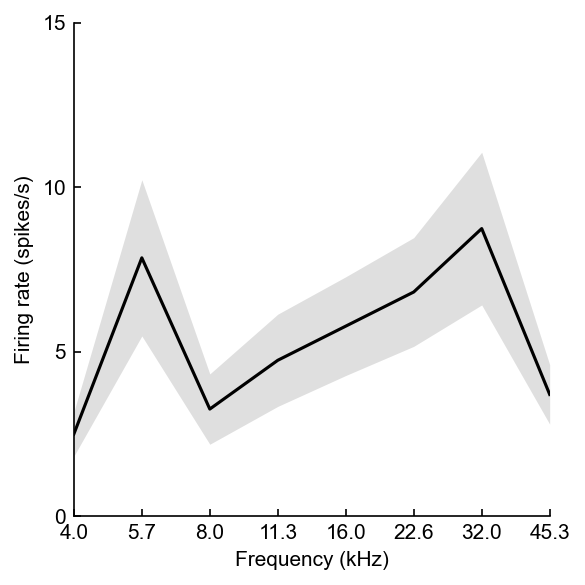

In [5]:
for clust in sessionfile.clusters.good:
    plt.close('all')
    #Caching search -- Unit
    idx = np.equal(sessionfile.spikes.clusters,clust)
    totaltimes = sessionfile.spikes.times[idx]
    
    toneFreqs = [4, 5.7, 8, 11.3, 16, 22.6, 32, 45.3]*3#, 64]*3
    tonepresentationnums = [8,9,9,9,9,9,9,9]*3#,9]*3
    numtones = len(tonepresentationnums)
    
    responses = dict()
    for tone in toneFreqs:
        responses[tone] = []
    
    toneidx = 0
    for idx,tonenum in enumerate(tonepresentationnums):
        for idxx in range(tonenum):
            trialstart = sessionfile.trials.starts[toneidx]
        
            window = 0.25
        
            #Caching search -- Trial
            tonestart = trialstart
            toneend = trialstart + window*sessionfile.meta.fs
            spikeidxs = np.logical_and(      np.greater(totaltimes,tonestart) , np.less(totaltimes,toneend)     )
            numspikes = np.sum(spikeidxs)
            
            responses[toneFreqs[idx]].append(numspikes / window)

            toneidx += 1
    
    #for tone in responses:
    #    print(tone)
    #    print(len(responses[tone]))
    #    print(responses[tone])
    #print('\n')
    
    X = []
    Y = []
    S = []
    tones = np.sort(np.unique(toneFreqs))
    for tone in tones:
        X.append(tone)
        Y.append(np.mean(responses[tone]))
        #S.append(np.std(responses[tone]))
        S.append(sem(responses[tone]))
    Y = np.array(Y)
    S = np.array(S)
        
    fig, ax = plt.subplots(figsize=(4,4))
    ax.plot(range(len(X)),Y,color='k')
    ax.fill_between(range(len(X)),Y-S,Y+S,color='k',alpha=0.125,lw=0)
    
    xlims = [0,len(Y)-1]
    ylims = ax.get_ylim()
    if ylims[0] < 0 and ylims[1] > 0:
        ax.plot(xlims,[0,0],color='k',lw=1,zorder=-10)
    ax.set_xlim(xlims)
    
    ylims = ax.get_ylim()
    ylims = [ np.floor(ylims[0]/5)*5, np.ceil(ylims[1]/5)*5 ]
    ax.set_ylim(ylims)
    ticks = np.linspace(ylims[0],ylims[1],num=int((ylims[1]-ylims[0])/5 +1) )
    ax.set_yticks(ticks)
    
    ax.set_xticks(range(len(Y)))
    ax.set_xticklabels(X)
    ax.set_ylabel('Firing rate (spikes/s)')
    ax.set_xlabel('Frequency (kHz)')
    
    plt.tight_layout()
    fig.savefig(os.path.join('D:\\\\Figures','Thalamus',sessionfile.meta.animal + ' ' + sessionfile.meta.region + ' ' + str(sessionfile.meta.recording_session) + ' cluster ' + str(clust) + '.pdf'),transparent=False,facecolor="white")

In [10]:
from matplotlib import font_manager

In [11]:
font_manager._rebuild()